# Koch Curve  and Koch Snowflake

Kai Zhang, Division of Natural and Applied Sciences, Duke Kunshan University, 2021

Dimension $D = \log 4 / \log 3$

### General Instruction 

__double click__ a cell if you want to edit it.

__run__ a cell by clicking "Run" button above or typing "__Enter + Shift__" to execute the code.

"__Esc + b__"  to create a new cell below current cell

"__Esc + a__"  to create a new cell above current cell

"__Esc + dd__"  to create delete current cell



Two types of cells are used here:
- Code: python format code
- Markdown: plain text to give instruction


In python, # means comment for human, which are not code to be run
```python
# this is comment, not code
```


In [1]:
import numpy as np  # numpy is a package to use for arrays
import matplotlib.pyplot as plt # to make plot
import math # to use functions like sqrt, exp, log

Define a function ``` scale(x, y) ``` that transforms a line segment to the next level of Koch curve.

In [2]:
def scale(x, y):
    '''
    x = [x0, x1], y = [y0, y1] are lists storing coordinates of the endpoints of the initial line segment
    scale() returns two lists, each of five elements, storing coordinates of the five points of Koch curve
    generated from the input line segment
    '''
    x1 = x[0]
    x5 = x[1]
    y1 = y[0]
    y5 = y[1]
    
    x2 = x1 + (x5-x1)/3.0
    x4 = x1 + (x5-x1)*2.0/3.0
    
    y2 = y1 + (y5-y1)/3.0
    y4 = y1 + (y5-y1)*2.0/3.0
    
    xm = (x1+x5)/2.0
    ym = (y1+y5)/2.0

    dx = - (y5-y1) / 3.0 * math.sqrt(3.0)/2.0
    dy = (x5-x1) / 3.0 * math.sqrt(3.0)/2.0
    
    x3 = xm + dx
    y3 = ym + dy
    
    return [x1,x2,x3,x4,x5], [y1,y2,y3,y4,y5]

plot a line segment

(-0.5, 0.5)

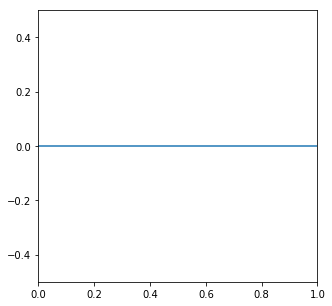

In [3]:
x0, y0 = [0,1], [0, 0]
plt.figure(figsize=(5,5))
plt.plot(x0, y0)
plt.xlim(0,1)
plt.ylim(-0.5,0.5)

test the effect of ``` scale(x,y) ``` on the line segment made above

(-0.5, 0.5)

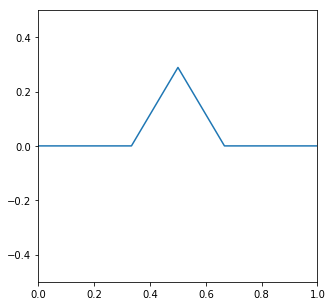

In [4]:
x1, y1 = scale(x0,y0)
plt.figure(figsize=(5,5))
plt.plot(x1, y1)
plt.xlim(0,1)
plt.ylim(-0.5,0.5)

Define a function ``` Koch(ngen, x0, y0)``` that generates the ``` ngen``` generations of Koch curve starting from line ``` (x0, y0)``` by applying ``` scale(x, y) ``` iteratively

In [5]:
def Koch(ngen, x0, y0):
    '''
    ngen is a integer specifying the number of generations to be generated
    x0, y0 are lists storing the coordinates of the endpoints of the initial line segment
    Koch() returns rx, ry, each is a list of list, e.g. rx[i] is a list storing the x coordnates 
    of the points in the ith generation of Koch curve. rx[i][j] is the x coordinate of the 
    jth point in the ith generation.
    '''
    rx = []
    ry = []
    rx.append(x0)
    ry.append(y0)

    for n in range(ngen):
        nseg = len(rx[n]) - 1
        #print(nseg)
        xn=[]
        yn=[]
        for i in range(nseg):        
            x, y = scale([rx[n][i], rx[n][i+1]], [ry[n][i], ry[n][i+1]] )
            for j in range(4):
                xn.append(x[j])
                yn.append(y[j])
        #append the last point
        xn.append(x[4])
        yn.append(y[4])
        
        rx.append(xn)
        ry.append(yn)
    
    return rx, ry

Use ```Koch(ngen, x0, y0) ``` on three edges of a triangle to make a Koch snowflake

In [7]:
ngen = 8
topx, topy=Koch(ngen,[-0.5,0.5],[math.sqrt(3)/2, math.sqrt(3)/2])
leftx, lefty=Koch(ngen,[0,-0.5],[0, math.sqrt(3)/2])
rightx, righty=Koch(ngen,[0.5,0],[math.sqrt(3)/2,0])

Plot the Koch snowflake

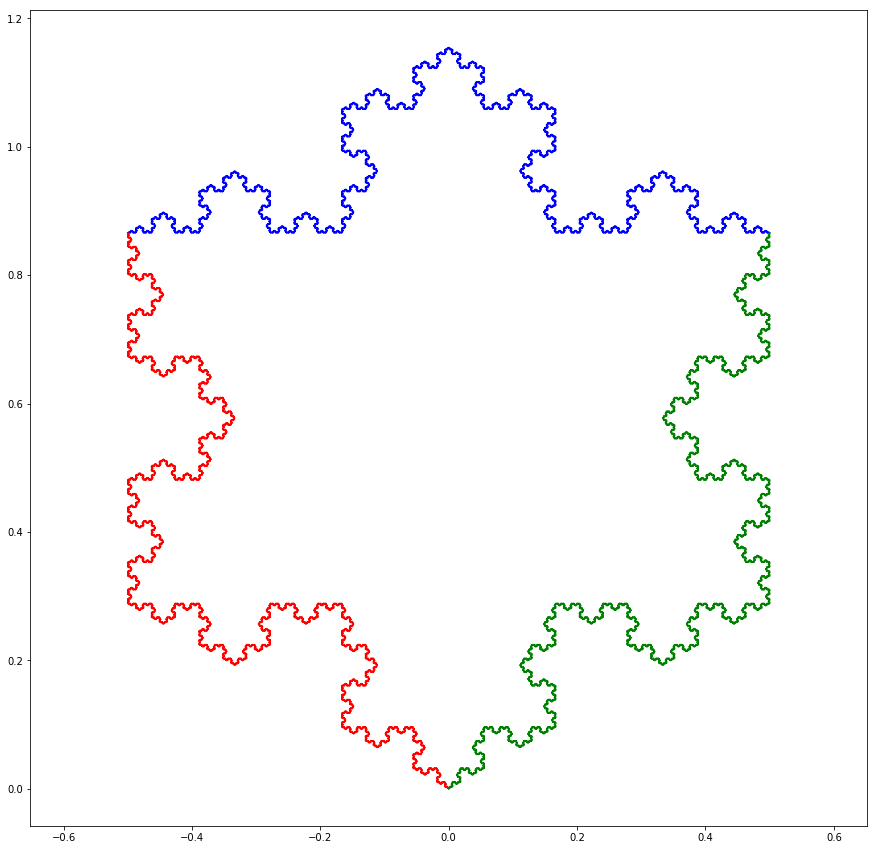

In [8]:
gen = 7
plt.figure(figsize=(15,15))
plt.axis('equal')

plt.plot(topx[gen],topy[gen], 'b')
plt.plot(leftx[gen],lefty[gen],'r')
plt.plot(rightx[gen],righty[gen],'g')

#plt.xlim(-0.6,0.6)
#plt.ylim(-0,1.2)

#plt.fill(x, y)

plt.show()

define a sequence of points ``` xcirc, ycirc``` to be used to plot a filled snowflake

In [9]:
ng = 5 # plot up to the ng generation
xcirc = rightx[ng] + leftx[ng] + topx[ng]
ycirc = righty[ng] + lefty[ng] + topy[ng]

Plot a filled Koch snowflake

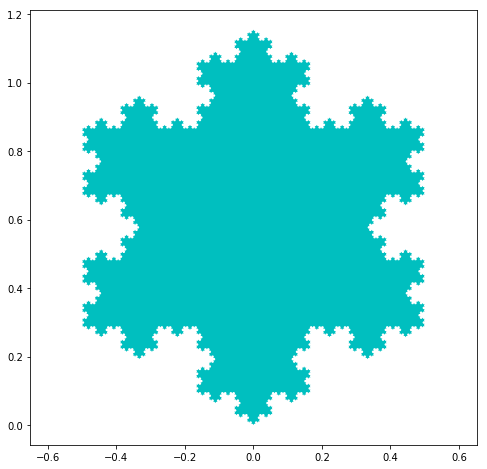

In [10]:
plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(xcirc, ycirc,'c')
plt.show()

The end